In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [8]:
data= pd.read_csv('diabetes1.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [12]:
print('Shape of X : ',x.shape)
print('Shape of Y : ',y.shape)

Shape of X :  (768, 8)
Shape of Y :  (768,)


In [13]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [14]:
print('Shape of X_train : ', x_train.shape)
print('Shape of Y_train : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Y_test : ', y_test.shape)

Shape of X_train :  (576, 8)
Shape of Y_train :  (576,)
Shape of X_test :  (192, 8)
Shape of Y_test :  (192,)


In [15]:
# 4. Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Initialize model
log_reg = LogisticRegression(max_iter=1000)

In [17]:
# Fit the model
log_reg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
# Predictions
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)[:,1]


In [36]:
# 5. Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.734375

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.81       125
           1       0.69      0.43      0.53        67

    accuracy                           0.73       192
   macro avg       0.72      0.66      0.67       192
weighted avg       0.73      0.73      0.72       192



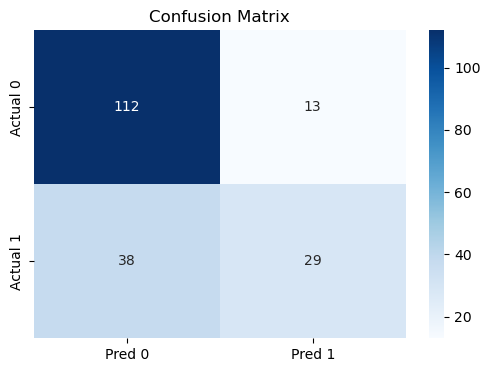

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0","Pred 1"], yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix")
plt.show()


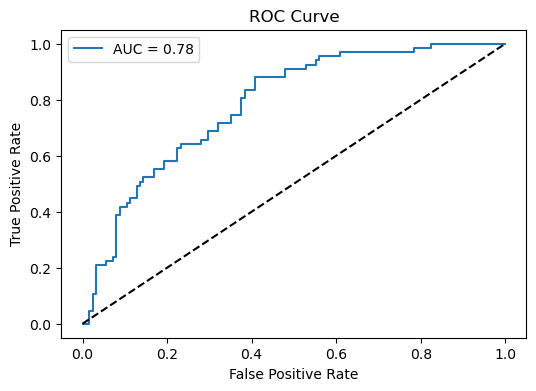

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [42]:

# 6. Conclusion
print("The Logistic Regression model achieved an accuracy of {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

The Logistic Regression model achieved an accuracy of 73.44%
